In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist  #dataset di input
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D


seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

# Esercitazione 12 _ Bonato Angela

Il problema da affrontare in questa esercitazione era l'uso di reti neurali per la classificazione di cifre scritte a mano. Per risolverlo ci si è appoggiati al dataset *MINST*, direttamente utilizzabile con Keras.

## Esercizio 12.1

Per prima cosa è stato richiesto di approcciare il problema con una rete neurale profonda (DNN) con livelli sequenziali. A partire dalla traccia di svolgimento fornita, ho svolto questo esercizio in maniera analoga a quanto fatto nella precedente esercitazione creando 3 modelli ognuno caratterizzato da una diversa funzione di ottimizzazione. 

A giudicare dall'accuratezza, dagli errori e dalle predizioni, la funzione più performante fra quelle usate è la discesa stocastica del gradiente (SGD). Al contrario, il modello in cui l'ottimizzazione è stata effettuata tramite algoritmo Adadelta risulta visibilmente inaccurato.

In [2]:
img_rows, img_cols=28, 28  #dimensioni delle immagini nel dataset

num_classes=10
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()  #dataset training e validazione

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

Esempio di datapoint con etichetta:  4


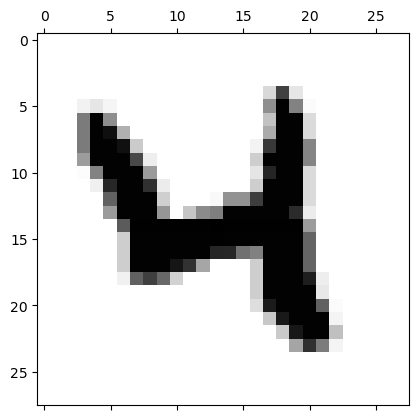

Che ha etichetta [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] dopo l'applicazione di to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
#reshaping e recasting dei dati

labels = np.array([0, 2, 1, 2, 0])
keras.utils.to_categorical(labels)

X_train=X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test=X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#normalizziamo il valore di ogni pixel in [0,1]
X_train /= 255
X_test /= 255

#esempio che fa capire il reshaping fatto
print('Esempio di datapoint con etichetta: ', Y_train[20])
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')  #nb lui li mostra invertendo i colori
plt.show()

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('Che ha etichetta', Y_train[20], "dopo l'applicazione di to_categorical")
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [4]:
#costruzione del modello sequenziale
def build_DNN():
    model=Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))  #applica dropout con rate 0.5
    model.add(Dense(num_classes, activation='softmax'))
    print('Costruzione del modello conclusa.')
    return model

#compilazione del modello
def compile_model(opt):
    model=build_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    print("Compilazione del modello conclusa.")
    return model

In [6]:
#creo il primo modello e faccio il training
a_model_DNN=compile_model('sgd')

a_history=a_model_DNN.fit(X_train, Y_train,
          batch_size=32,
          epochs=15,
          verbose=1,
          validation_data=(X_test, Y_test))

Costruzione del modello conclusa.
Compilazione del modello conclusa.
Epoch 1/15
1875/1875 [==============================] - 22s 11ms/step - loss: 0.7546 - acc: 0.7774 - val_loss: 0.3118 - val_acc: 0.9140
Epoch 2/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3806 - acc: 0.8927 - val_loss: 0.2437 - val_acc: 0.9297
Epoch 3/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3106 - acc: 0.9116 - val_loss: 0.2045 - val_acc: 0.9406
Epoch 4/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2654 - acc: 0.9265 - val_loss: 0.1787 - val_acc: 0.9475
Epoch 5/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2337 - acc: 0.9346 - val_loss: 0.1627 - val_acc: 0.9513
Epoch 6/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2131 - acc: 0.9404 - val_loss: 0.1464 - val_acc: 0.9560
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1929 - acc: 0.9455 - val_loss: 0.13

In [7]:
#creo il secondo modello e faccio il training
b_model_DNN=compile_model('adadelta')

b_history=b_model_DNN.fit(X_train, Y_train,
          batch_size=32,
          epochs=15,
          verbose=1,
          validation_data=(X_test, Y_test))

Costruzione del modello conclusa.
Compilazione del modello conclusa.
Epoch 1/15
1875/1875 [==============================] - 40s 21ms/step - loss: 2.2555 - acc: 0.1567 - val_loss: 2.1013 - val_acc: 0.3359
Epoch 2/15
1875/1875 [==============================] - 35s 18ms/step - loss: 2.0689 - acc: 0.2881 - val_loss: 1.9249 - val_acc: 0.5421
Epoch 3/15
1875/1875 [==============================] - 35s 19ms/step - loss: 1.9099 - acc: 0.4038 - val_loss: 1.7586 - val_acc: 0.6352
Epoch 4/15
1875/1875 [==============================] - 33s 18ms/step - loss: 1.7636 - acc: 0.4851 - val_loss: 1.6005 - val_acc: 0.6870
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 1.6304 - acc: 0.5370 - val_loss: 1.4547 - val_acc: 0.7253
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 1.5125 - acc: 0.5755 - val_loss: 1.3248 - val_acc: 0.7498
Epoch 7/15
1875/1875 [==============================] - 33s 18ms/step - loss: 1.4012 - acc: 0.6124 - val_loss: 1.20

In [8]:
#creo il terzo modello e faccio il training
c_model_DNN=compile_model('nadam')

c_history=c_model_DNN.fit(X_train, Y_train,
          batch_size=32,
          epochs=15,
          verbose=1,
          validation_data=(X_test, Y_test))

Costruzione del modello conclusa.
Compilazione del modello conclusa.
Epoch 1/15
1875/1875 [==============================] - 34s 17ms/step - loss: 0.2816 - acc: 0.9174 - val_loss: 0.1070 - val_acc: 0.9685
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1210 - acc: 0.9652 - val_loss: 0.0941 - val_acc: 0.9710
Epoch 3/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0881 - acc: 0.9737 - val_loss: 0.0915 - val_acc: 0.9723
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0681 - acc: 0.9798 - val_loss: 0.0772 - val_acc: 0.9787
Epoch 5/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0568 - acc: 0.9829 - val_loss: 0.0764 - val_acc: 0.9793
Epoch 6/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0459 - acc: 0.9862 - val_loss: 0.0772 - val_acc: 0.9791
Epoch 7/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0415 - acc: 0.9874 - val_loss: 0.07

313/313 [==============================] - 2s 5ms/step - loss: 0.0912 - acc: 0.9708
Modello a, ottimizzatore=sgd
Test loss: 0.09120722115039825
Test accuracy: 0.97079998254776


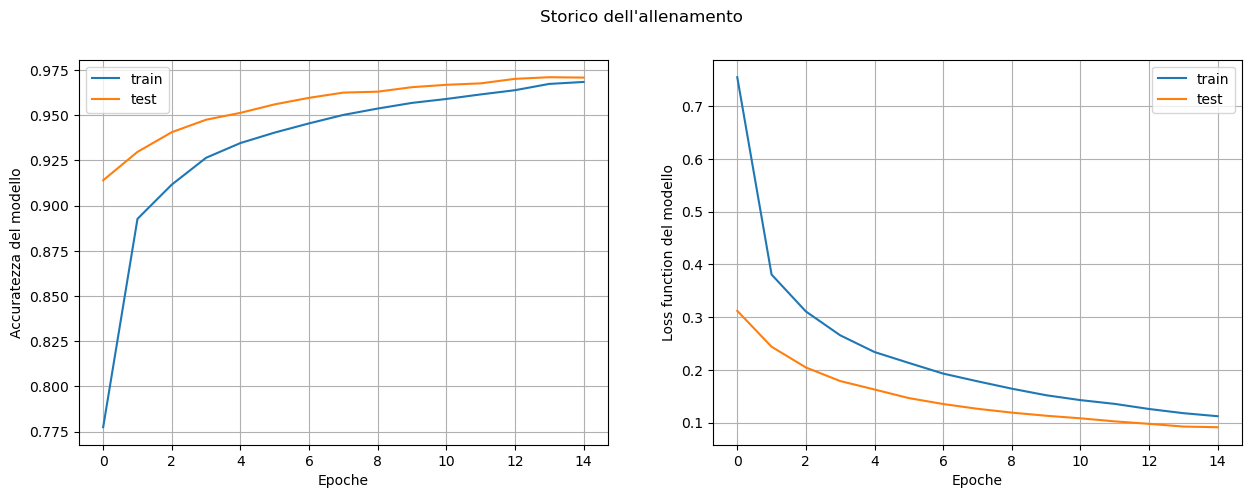

In [9]:
#valutazione dei modelli
a_score=a_model_DNN.evaluate(X_test, Y_test, verbose=1)

print('Modello a, ottimizzatore=sgd')
print('Test loss:', a_score[0])
print('Test accuracy:', a_score[1])

a_vfig ,(a_vplt1, a_vplt2) = plt.subplots(1, 2, figsize=(15, 5))

a_vplt1.plot(a_history.history['acc'])
a_vplt1.plot(a_history.history['val_acc'])
a_vplt1.set_ylabel('Accuratezza del modello')
a_vplt1.set_xlabel('Epoche')
a_vplt1.grid(True)
a_vplt1.legend(['train', 'test'], loc='best')

a_vplt2.plot(a_history.history['loss'])
a_vplt2.plot(a_history.history['val_loss'])
a_vplt2.set_ylabel('Loss function del modello')
a_vplt2.set_xlabel('Epoche')
a_vplt2.grid(True)
a_vplt2.legend(['train', 'test'], loc='best')

a_vfig.suptitle("Storico dell'allenamento")
plt.show()

313/313 [==============================] - 1s 4ms/step - loss: 0.7091 - acc: 0.8534
Modello b, ottimizzatore=adadelta
Test loss: 0.7090709209442139
Test accuracy: 0.8533999919891357


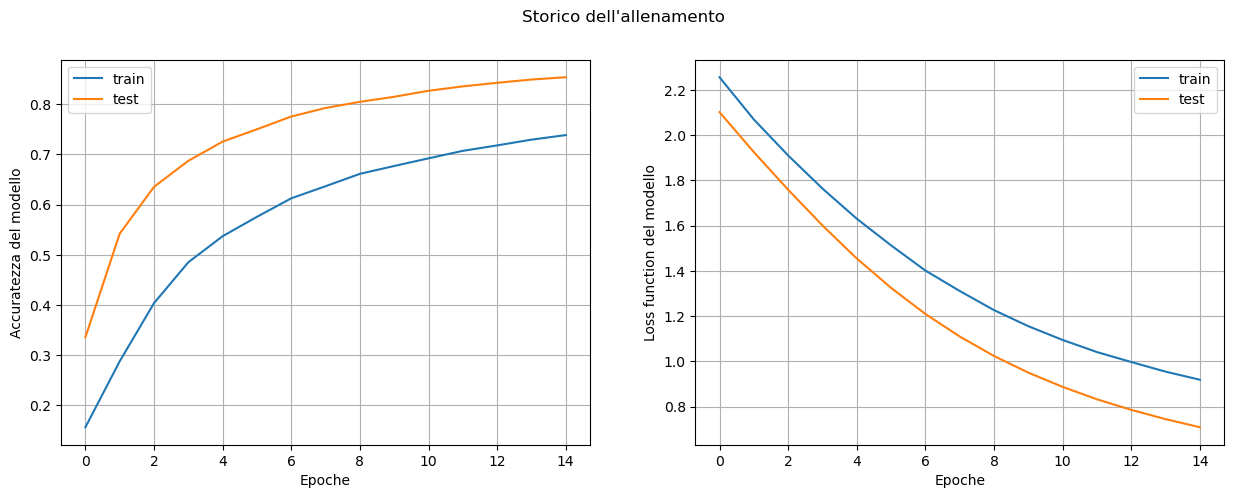

In [10]:
b_score=b_model_DNN.evaluate(X_test, Y_test, verbose=1)

print('Modello b, ottimizzatore=adadelta')
print('Test loss:', b_score[0])
print('Test accuracy:', b_score[1])

b_vfig ,(b_vplt1, b_vplt2) = plt.subplots(1, 2, figsize=(15, 5))

b_vplt1.plot(b_history.history['acc'])
b_vplt1.plot(b_history.history['val_acc'])
b_vplt1.set_ylabel('Accuratezza del modello')
b_vplt1.set_xlabel('Epoche')
b_vplt1.grid(True)
b_vplt1.legend(['train', 'test'], loc='best')

b_vplt2.plot(b_history.history['loss'])
b_vplt2.plot(b_history.history['val_loss'])
b_vplt2.set_ylabel('Loss function del modello')
b_vplt2.set_xlabel('Epoche')
b_vplt2.grid(True)
b_vplt2.legend(['train', 'test'], loc='best')

b_vfig.suptitle("Storico dell'allenamento")
plt.show()

313/313 [==============================] - 1s 4ms/step - loss: 0.0953 - acc: 0.9829
Modello c, ottimizzatore=nadam
Test loss: 0.09528929740190506
Test accuracy: 0.9829000234603882


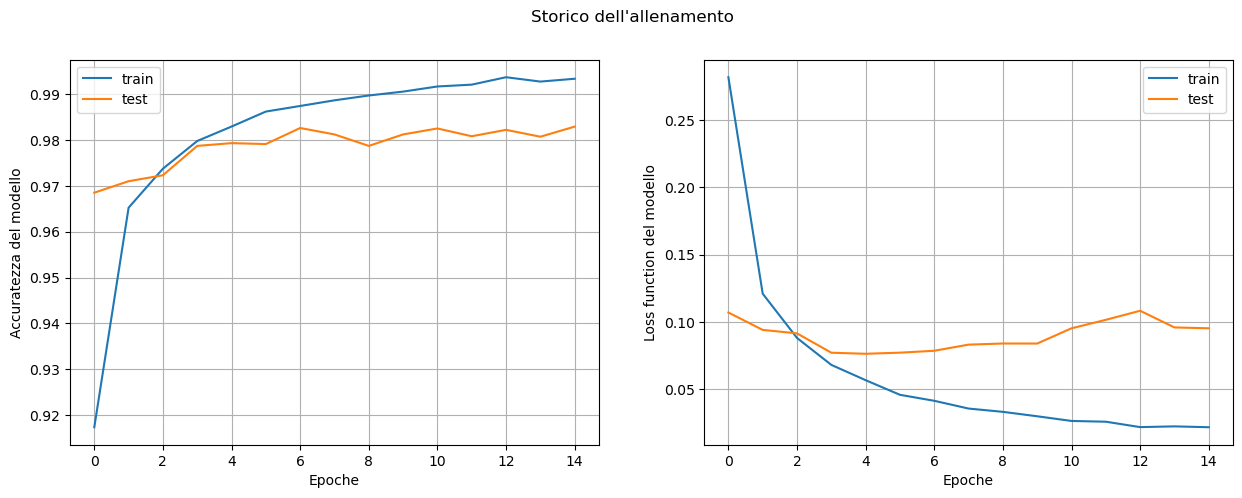

In [11]:
c_score=c_model_DNN.evaluate(X_test, Y_test, verbose=1)

print('Modello c, ottimizzatore=nadam')
print('Test loss:', c_score[0])
print('Test accuracy:', c_score[1])

c_vfig ,(c_vplt1, c_vplt2) = plt.subplots(1, 2, figsize=(15, 5))

c_vplt1.plot(c_history.history['acc'])
c_vplt1.plot(c_history.history['val_acc'])
c_vplt1.set_ylabel('Accuratezza del modello')
c_vplt1.set_xlabel('Epoche')
c_vplt1.grid(True)
c_vplt1.legend(['train', 'test'], loc='best')

c_vplt2.plot(c_history.history['loss'])
c_vplt2.plot(c_history.history['val_loss'])
c_vplt2.set_ylabel('Loss function del modello')
c_vplt2.set_xlabel('Epoche')
c_vplt2.grid(True)
c_vplt2.legend(['train', 'test'], loc='best')

c_vfig.suptitle("Storico dell'allenamento")
plt.show()

313/313 [==============================] - 1s 4ms/step


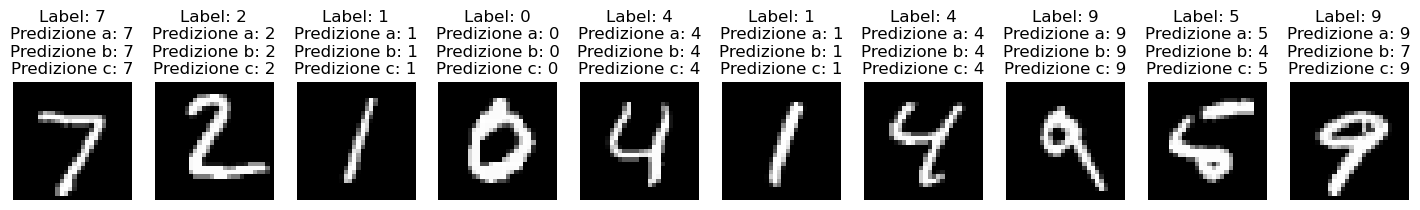

In [12]:
#predizioni

#scommenta prossima riga per rieseguire questa cella
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

a_predictions=a_model_DNN.predict(X_test)
b_predictions=b_model_DNN.predict(X_test)
c_predictions=c_model_DNN.predict(X_test)

X_test=X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(18, 10)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Label: {}\nPredizione a: {}\nPredizione b: {}\nPredizione c: {}".format(np.argmax(Y_test[i]), np.argmax(a_predictions[i]), np.argmax(b_predictions[i]), np.argmax(c_predictions[i])))    
    plt.axis('off') 
plt.show()

## Esercizio 12.2

Trattandosi di un problema di classificazione di immagini, in realtà, il tipo di rete neurale più adatta è convoluzionale (CNN). In questo esercizio veniva richiesto di costruirne una e applicarla sempre alle immagini del MINST. Dopo alcuni tentativi ho costruito una rete includendo layer convoluzionali e di pooling, per poi aggiungere dei livelli utili a rendere quello di output un layer denso con 10 neuroni (uno per ogni possibile cifra) con attivazione $softmax$. In questo modo la rete è in grado di determinare qual è la classificazione più probabile per l'immagine in esame. 

Sia in termini di accuratezza e errori, che in termini di predizioni, la rete sembra dare buoni risultati senza incorrere in underfitting o overfitting.

In [13]:
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
     
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [14]:
#costruzione e compilazione del modello
def create_CNN():
    model=Sequential()
    model.add(Conv2D(num_classes, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(15, (5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['acc'])
    return model

In [16]:
#creazione e training del modello
model_CNN=create_CNN()

cnn_history=model_CNN.fit(X_train, Y_train, batch_size=32, epochs=15, 
                          verbose=1, validation_data=(X_test, Y_test))

cnn_score=model_CNN.evaluate(X_test, Y_test, verbose=1)

print('Modello con rete convoluzionale')
print('Test loss:', cnn_score[0])
print('Test accuracy:', cnn_score[1])

Epoch 1/15
1875/1875 [==============================] - 52s 27ms/step - loss: 0.8032 - acc: 0.7362 - val_loss: 0.1893 - val_acc: 0.9476
Epoch 2/15
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2781 - acc: 0.9149 - val_loss: 0.1182 - val_acc: 0.9646
Epoch 3/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2165 - acc: 0.9332 - val_loss: 0.0974 - val_acc: 0.9717
Epoch 4/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1887 - acc: 0.9420 - val_loss: 0.0806 - val_acc: 0.9741
Epoch 5/15
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1671 - acc: 0.9488 - val_loss: 0.0692 - val_acc: 0.9785
Epoch 6/15
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1538 - acc: 0.9522 - val_loss: 0.0606 - val_acc: 0.9800
Epoch 7/15
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1445 - acc: 0.9547 - val_loss: 0.0549 - val_acc: 0.9826
Epoch 8/15
1875/1875 [==========================

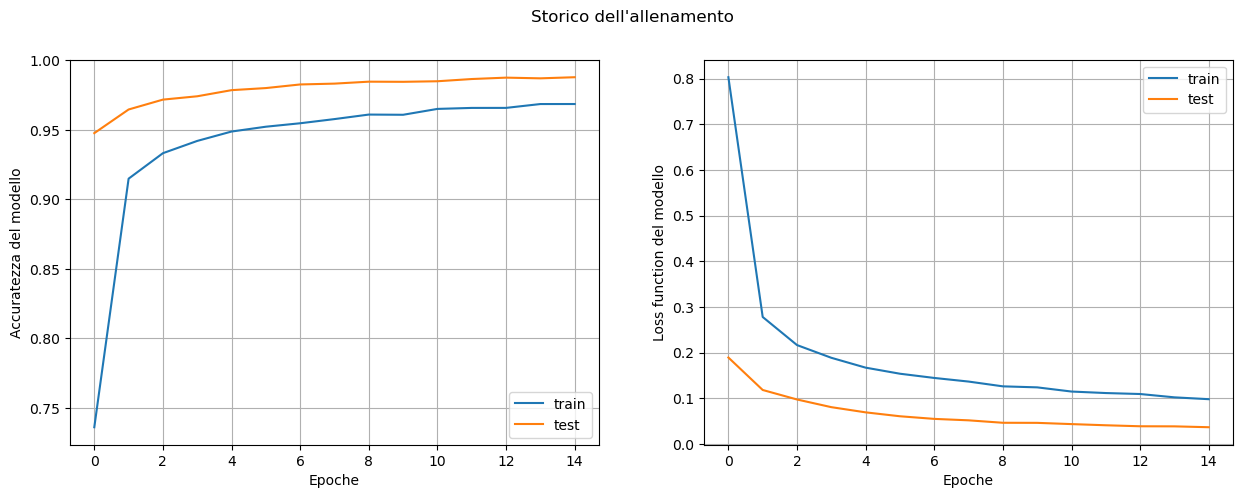

In [17]:
#valutazione del modello
cnnfig ,(cnnplt1, cnnplt2) = plt.subplots(1, 2, figsize=(15, 5))

cnnplt1.plot(cnn_history.history['acc'])
cnnplt1.plot(cnn_history.history['val_acc'])
cnnplt1.set_ylabel('Accuratezza del modello')
cnnplt1.set_xlabel('Epoche')
cnnplt1.grid(True)
cnnplt1.legend(['train', 'test'], loc='best')

cnnplt2.plot(cnn_history.history['loss'])
cnnplt2.plot(cnn_history.history['val_loss'])
cnnplt2.set_ylabel('Loss function del modello')
cnnplt2.set_xlabel('Epoche')
cnnplt2.grid(True)
cnnplt2.legend(['train', 'test'], loc='best')

cnnfig.suptitle("Storico dell'allenamento")
plt.show()

313/313 [==============================] - 2s 5ms/step


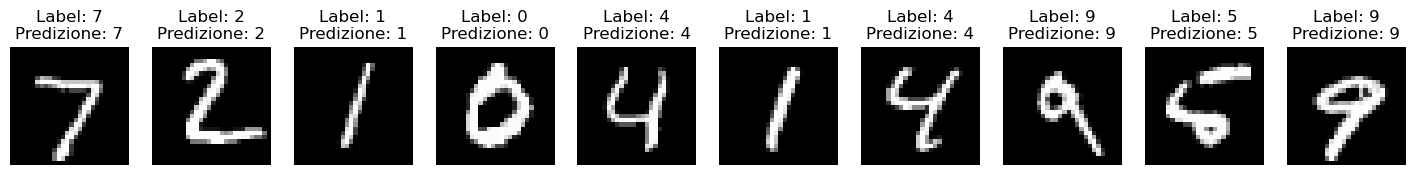

In [18]:
#predizioni

#scommenta prossima riga per rieseguire questa cella
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

cnn_predictions=a_model_DNN.predict(X_test)

X_test=X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(18, 10)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Label: {}\nPredizione: {}".format(np.argmax(Y_test[i]), np.argmax(cnn_predictions[i])))    
    plt.axis('off') 
plt.show()

## Esercizio 12.3

Per testare ulteriormente e confrontare le due reti create, ho sottoposto loro 10 cifre non presenti nel dataset usato finora ma scritte da me (rispettando il formato del MINST). E' evidente che, come atteso, la DNN performa peggio della CNN sul nuovo dataset proposto. Anche la CNN, però, fa più fatica di prima a predire la label corretta. Probabilmente in questo gioca un ruolo anche il fatto che i numeri da me scritti non sono tutti ben centrati e dimensionati come quelli del MINST.

In [21]:
digits_filenames = np.array(["./cifremie/" + str(i)+'.png'for i in range(10)])

digit_in=[]
pix=[]
data=[]

for i in range(10):
    im = Image.open(digits_filenames[i]).convert('L')
    digit_in.append(im)

ydim, xdim=28, 28

for i in range(10):
    data.append(np.zeros((xdim,ydim)))
    pix.append(digit_in[i].load())

for i in range(10):
    for j in range(xdim):
        for k in range(ydim):
            data[i][j,k] = pix[i][k,j]/255

1/1 [==============================] - 0s 21ms/step


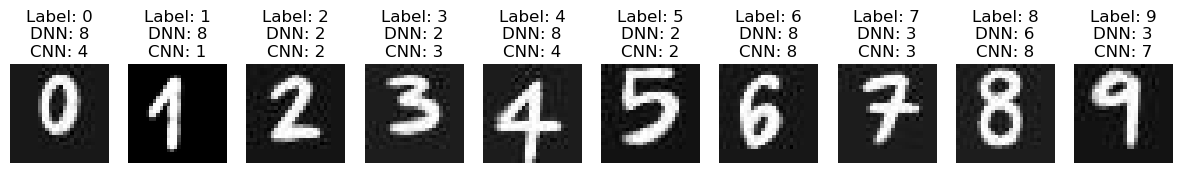

In [22]:
predict_CNN=[]
predict_DNN=[]

for i in range(10):
    data[i]=data[i].reshape(1,xdim,ydim,1)
    
for i in range(10):
    a=model_CNN.predict(data[i])
    predict_CNN.append(a)
    
for i in range(10):
    data[i]=data[i].reshape(data[i].shape[0],xdim*ydim)
    
for i in range(10):
    a=a_model_DNN.predict(data[i])
    predict_DNN.append(a)
    
for i in range(10):
    data[i]=data[i].reshape(xdim,ydim)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i], cmap='gray')
    plt.title("Label: {}\nDNN: {}\nCNN: {}".format(i, np.argmax(predict_DNN[i]), np.argmax(predict_CNN[i])))
    plt.axis('off')
plt.show()